In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load image
image = cv2.imread('B2DBy.jpg', cv2.IMREAD_GRAYSCALE)

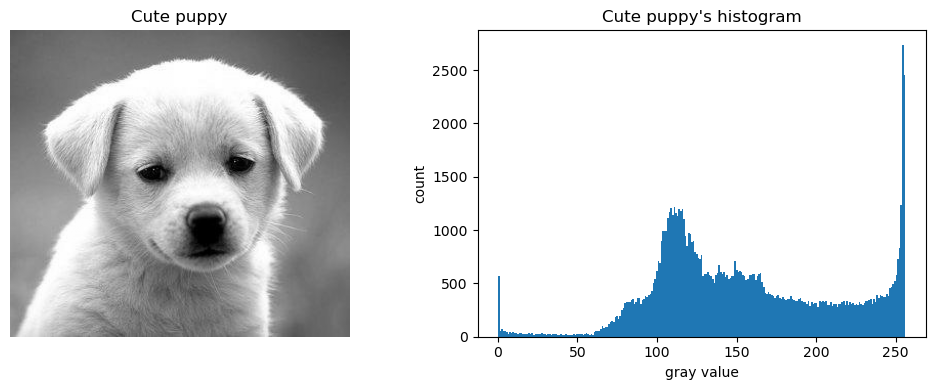

In [41]:
fig, axs = plt.subplots(1, 2, figsize=(10,4))

axs[0].imshow(image, cmap='gray')
axs[0].axis('off')
axs[0].set_title('Cute puppy')

axs[1].hist(image.ravel(), bins=255, range=[0,256])
axs[1].set_xlabel('gray value')
axs[1].set_ylabel('count')
axs[1].set_title('Cute puppy\'s histogram')

plt.tight_layout()
plt.show()

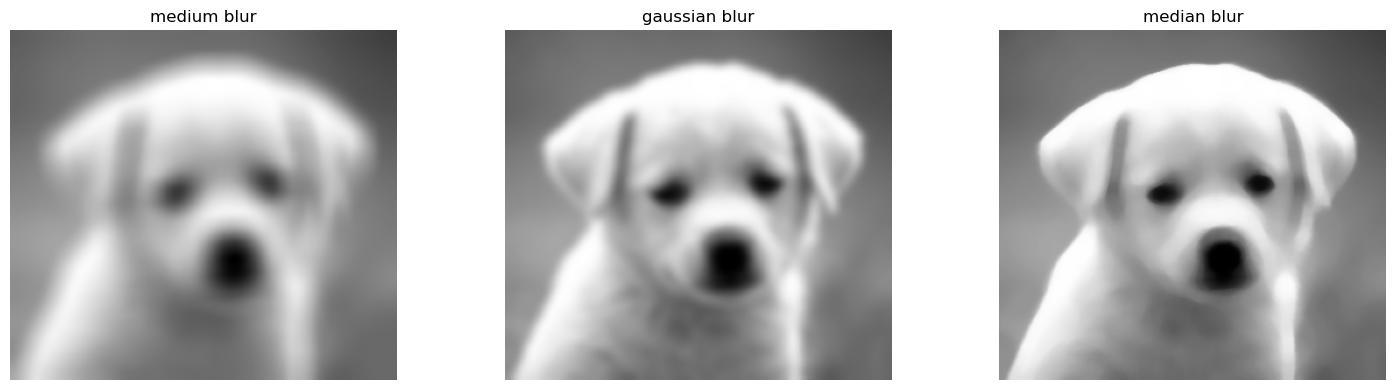

In [60]:
fig, axs = plt.subplots(1, 3, figsize=(15,4))

img_blur_medium = cv2.blur(image, (25,25))
img_blur_gaussian = cv2.GaussianBlur(image, (15,15), 4)
img_blur_median = cv2.medianBlur(image, 15)

axs[0].imshow(img_blur_medium, cmap='gray')
axs[0].set_title('medium blur')
axs[0].axis('off')

axs[1].imshow(img_blur_gaussian, cmap='gray')
axs[1].set_title('gaussian blur')
axs[1].axis('off')

axs[2].imshow(img_blur_median, cmap='gray')
axs[2].set_title('median blur')
axs[2].axis('off')

plt.tight_layout()
plt.show()

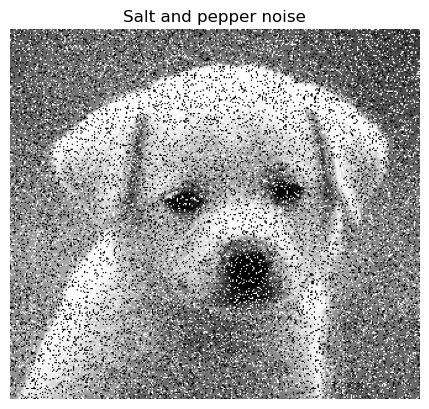

In [34]:
# Apply gauss noise
mean = 0
std = 25
def gauss_noise(image, mean, std):
    gauss_noise  = np.random.normal(mean, std, image.shape)
    output = image + gauss_noise
    output = np.clip(output, 0, 255).astype(np.uint8)
    return output

def salt_pepper_noise(image, prob=0.25):
    output = np.copy(image)
    rdn = np.random.rand(*image.shape)
    output[rdn < prob/2] = 0
    output[rdn > 1 - (prob/2)] = 255
    return output

def periodic_noise(image, amplitude, fx=0.05, fy=0.05, phase=0):
    rows, cols = image.shape

    # Cordinate grid
    x = np.arange(cols)
    y = np.arange(rows)
    X, Y = np.meshgrid(x, u)

    noise = amplitude * np.sin(2 * np.pi * (fx * X + fy * Y))
    
gauss_noise_img = gauss_noise(image, mean, std)
salt_pepper_image = salt_pepper_noise(image)
plt.imshow(salt_pepper_image, cmap='gray')
plt.title('Salt and pepper noise')
plt.axis('off')
plt.show()